In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date,timedelta,datetime
from dateutil.rrule import rrule,DAILY

In [2]:
df=pd.read_csv("ted_youtube_videos.csv")
df

,video_id,video_title,publish_time,viewCount,likeCount,commentCount,duration
0,GZGY0wPAnus,The art of misdirection | Apollo Robbins,2013-09-13,24547289.0,488261.0,12537.0,0 days 00:08:48
1,R1vskiVDwl4,Celeste Headlee: 10 ways to have a better conv...,2016-03-08,12098006.0,314648.0,5119.0,0 days 00:11:45
2,SFnMTHhKdkw,Every kid needs a champion | Rita Pierson,2013-05-03,5167635.0,64830.0,1304.0,0 days 00:07:49
3,iCvmsMzlF7o,The power of vulnerability | Brené Brown,2011-01-03,16807075.0,269657.0,5247.0,0 days 00:20:50
4,cXbXNV9-ZAg,My love letter to cosplay | Adam Savage,2016-08-23,1816721.0,103538.0,2165.0,0 days 00:13:08
...,...,...,...,...,...,...,...
499,_ZW-8-NCKMw,Your smartphone is a civil rights issue | Chri...,2016-11-23,164854.0,2226.0,632.0,0 days 00:07:45
500,R9XKRR7aKHI,The story we tell about millennials -- and who...,2019-07-29,85232.0,1408.0,389.0,0 days 00:11:29
501,Ie9cACQnqew,Why you should be a climate activist | Luisa N...,2019-10-04,80966.0,2940.0,1163.0,0 days 00:17:44
502,vw5HJhIlJp4,"Gayle Tzemach Lemmon: Women entrepreneurs, exa...",2012-01-27,78354.0,819.0,271.0,0 days 00:13:17


In [3]:
#change duration format into second
df["duration"]=pd.to_timedelta(df["duration"])
df["duration"]=df["duration"].apply(lambda x: x.seconds)

In [4]:
df.dtypes

video_id         object
video_title      object
publish_time     object
viewCount       float64
likeCount       float64
commentCount    float64
duration          int64
dtype: object

In [5]:
df.isnull().sum()

video_id        0
video_title     0
publish_time    0
viewCount       4
likeCount       4
commentCount    4
duration        0
dtype: int64

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.duplicated().any()

False

In [8]:
df.reset_index(drop=True,inplace=True,)

In [9]:
#Seperate video_title column
df["title"]=df["video_title"].apply(lambda x:x.split("|")[0])

In [10]:
names=[]
for x in df["video_title"]:
    if len(x.split("|"))==2:
        names.append(x.split("|")[1])
    else:
        names.append("Unknown")
df["narattor"]=names

In [11]:
df.drop("video_title",inplace=True,axis=1)

In [12]:
#change datatype of publish time
df["publish_time"]=pd.to_datetime(df["publish_time"])

### Some analysis on Duration

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


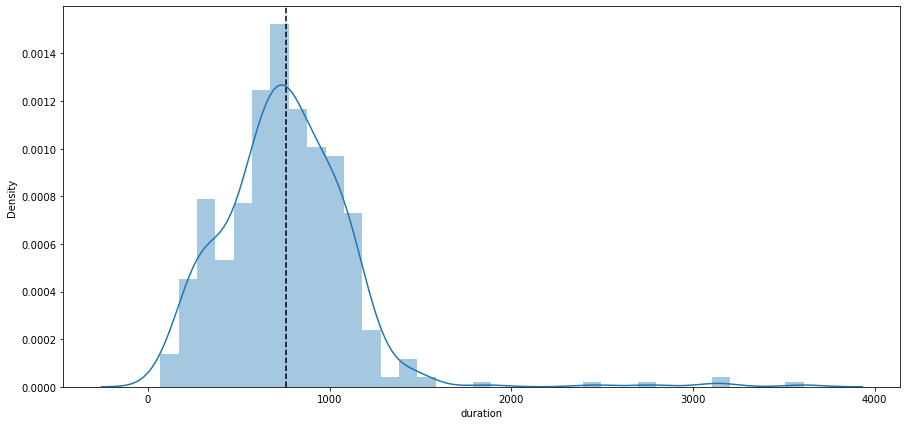

In [13]:
fig=plt.figure(figsize=(15,7))
sns.distplot(df["duration"])
plt.axvline(df["duration"].mean(),linestyle="--",color="black")
plt.show()

* the distribution is skewed to the right 
* average duration time for all the videos in the channel is near 754 second(nearly 12 minutes)

In [14]:
df["duration"].describe()

count     500.000000
mean      759.772000
std       373.785992
min        67.000000
25%       549.250000
50%       738.000000
75%       961.500000
max      3609.000000
Name: duration, dtype: float64

In [15]:
# divided into 4 bins according to the quantile
df["duration_bins"]=pd.qcut(df['duration'], q=4)
df

,video_id,publish_time,viewCount,likeCount,commentCount,duration,title,narattor,duration_bins
0,GZGY0wPAnus,2013-09-13,24547289.0,488261.0,12537.0,528,The art of misdirection,Apollo Robbins,"(66.999, 549.25]"
1,R1vskiVDwl4,2016-03-08,12098006.0,314648.0,5119.0,705,Celeste Headlee: 10 ways to have a better conv...,TED,"(549.25, 738.0]"
2,SFnMTHhKdkw,2013-05-03,5167635.0,64830.0,1304.0,469,Every kid needs a champion,Rita Pierson,"(66.999, 549.25]"
3,iCvmsMzlF7o,2011-01-03,16807075.0,269657.0,5247.0,1250,The power of vulnerability,Brené Brown,"(961.5, 3609.0]"
4,cXbXNV9-ZAg,2016-08-23,1816721.0,103538.0,2165.0,788,My love letter to cosplay,Adam Savage,"(738.0, 961.5]"
...,...,...,...,...,...,...,...,...,...
495,_ZW-8-NCKMw,2016-11-23,164854.0,2226.0,632.0,465,Your smartphone is a civil rights issue,Christopher Soghoian,"(66.999, 549.25]"
496,R9XKRR7aKHI,2019-07-29,85232.0,1408.0,389.0,689,The story we tell about millennials -- and who...,Reniqua Allen,"(549.25, 738.0]"
497,Ie9cACQnqew,2019-10-04,80966.0,2940.0,1163.0,1064,Why you should be a climate activist,Luisa Neubauer,"(961.5, 3609.0]"
498,vw5HJhIlJp4,2012-01-27,78354.0,819.0,271.0,797,"Gayle Tzemach Lemmon: Women entrepreneurs, exa...",Unknown,"(738.0, 961.5]"


<AxesSubplot:xlabel='duration_bins'>

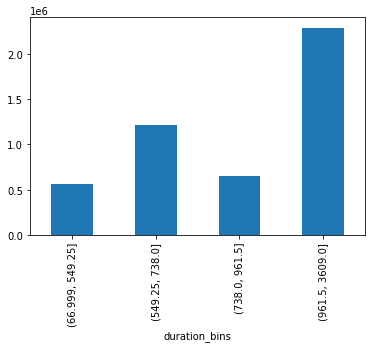

In [16]:
# view counts vs duration dist plot
duration_view_counts=df.groupby("duration_bins")["viewCount"].mean()
duration_view_counts.plot(kind="bar")

* short videos have few viewers compared to the others
* Longer videos tends to have more viewers with the exception for the videos with the duration between(736 and 954) seconds

<AxesSubplot:xlabel='duration_bins'>

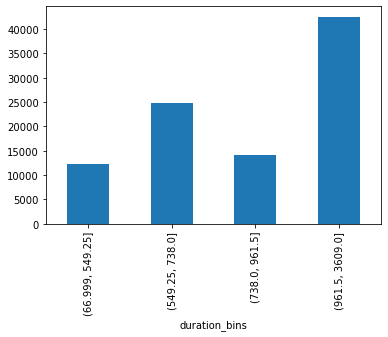

In [17]:
#like counts vs duration distplot
duration_like_counts=df.groupby("duration_bins")["likeCount"].mean()
duration_like_counts.plot(kind="bar")

* This distribution is almost exacly as the view counts.


- [Note . view counts and like counts must have positive correlation]

<AxesSubplot:xlabel='duration_bins'>

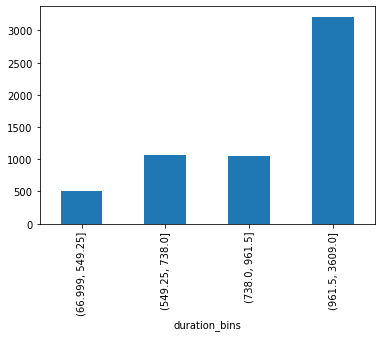

In [18]:
#comment counts vs duration distplot
duration_comment_counts=df.groupby("duration_bins")["commentCount"].mean()
duration_comment_counts.plot(kind="bar")

In [19]:
df.dtypes

video_id                 object
publish_time     datetime64[ns]
viewCount               float64
likeCount               float64
commentCount            float64
duration                  int64
title                    object
narattor                 object
duration_bins          category
dtype: object

In [20]:
#View_counts Overtime
date_time_df=df.groupby("publish_time",as_index=False).sum()

#create sequence of dates to get missing days
every_day=pd.Series(rrule(DAILY,dtstart=datetime(2008,3,13),until=datetime(2021,12,30,)))
every_day

0      2008-03-13
1      2008-03-14
2      2008-03-15
3      2008-03-16
4      2008-03-17
          ...    
5036   2021-12-26
5037   2021-12-27
5038   2021-12-28
5039   2021-12-29
5040   2021-12-30
Length: 5041, dtype: datetime64[ns]

In [21]:
date_time_df=date_time_df.merge(every_day.rename("days"),how="outer",left_on="publish_time",right_on="days")
date_time_df.drop("publish_time",axis=1,inplace=True)
date_time_df.sort_values(by="days",inplace=True)

In [22]:
date_time_df.fillna(0,inplace=True)

In [23]:
date_time_df.set_index("days",inplace=True)

In [24]:
date_time_df

,viewCount,likeCount,commentCount,duration
days,,,,
2008-03-13,7297569.0,74409.0,5219.0,1212.0
2008-03-14,0.0,0.0,0.0,0.0
2008-03-15,0.0,0.0,0.0,0.0
2008-03-16,0.0,0.0,0.0,0.0
2008-03-17,0.0,0.0,0.0,0.0
...,...,...,...,...
2021-12-26,0.0,0.0,0.0,0.0
2021-12-27,30453.0,705.0,53.0,547.0
2021-12-28,41100.0,1179.0,168.0,591.0


* There are some days that the channel doesn't have any view

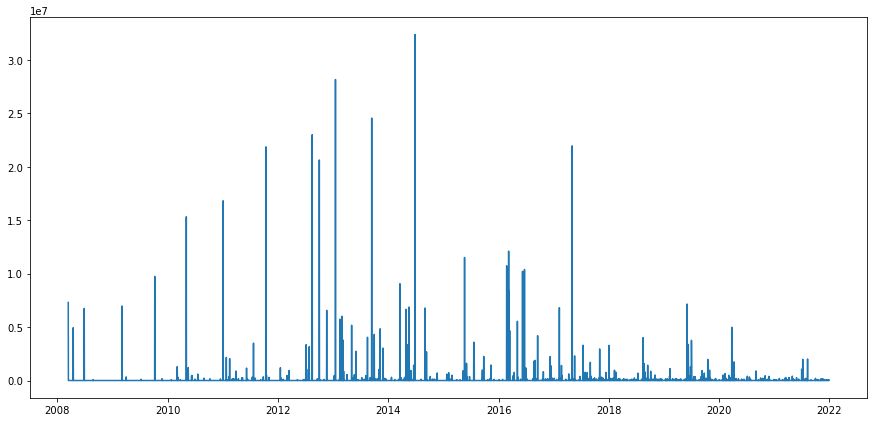

In [25]:
#plot view_count overtime linegraph
fig=plt.figure(figsize=(15,7))
plt.plot(date_time_df["viewCount"])
plt.show()

* It is unclear and smudgy with overall years
* necessary to analyse by sector of years for clarification

In [26]:
def plot_sector_view_count(df:pd.DataFrame,Year:datetime.year,ax:plt.axes):
    filter=df.index.year==Year
    plot_df=df[filter]

    plot=plot_df["viewCount"].plot(figsize=(15,7),ax=ax)
    return(plot)

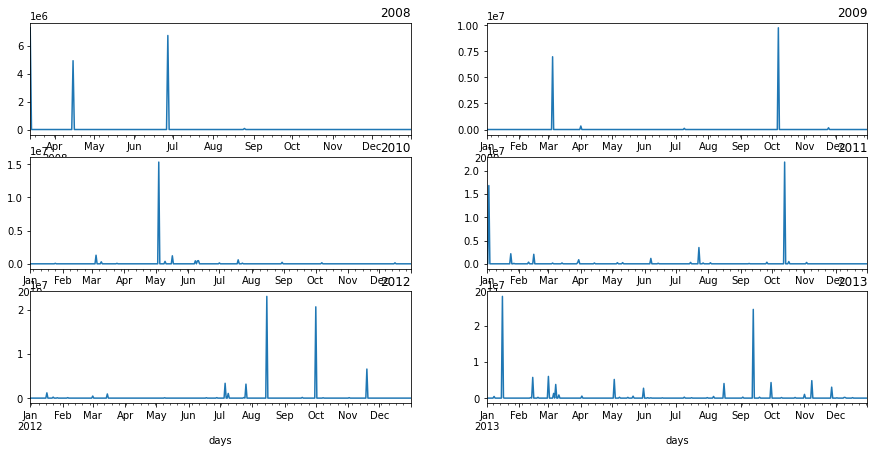

In [27]:
# From 2008 to 2013
fig,axes=plt.subplots(3,2,figsize=(20,20))

year_range=range(2008,2014,1)
for year,ax in zip(year_range,axes.ravel()):
    plot_sector_view_count(date_time_df,year,ax)
    ax.set_title(f"{year}",loc="right")

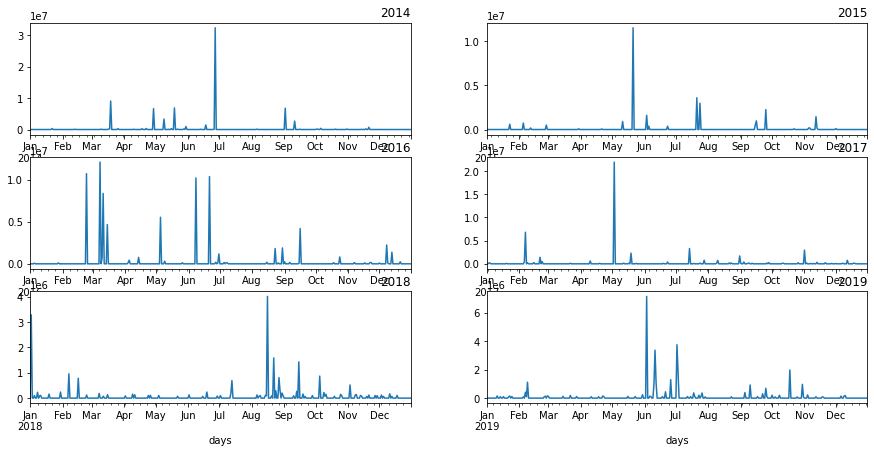

In [28]:
# From 2008 to 2013
fig,axes=plt.subplots(3,2,figsize=(20,20))

year_range=range(2014,2020,1)
for year,ax in zip(year_range,axes.ravel()):
    plot_sector_view_count(date_time_df,year,ax)
    ax.set_title(f"{year}",loc="right")

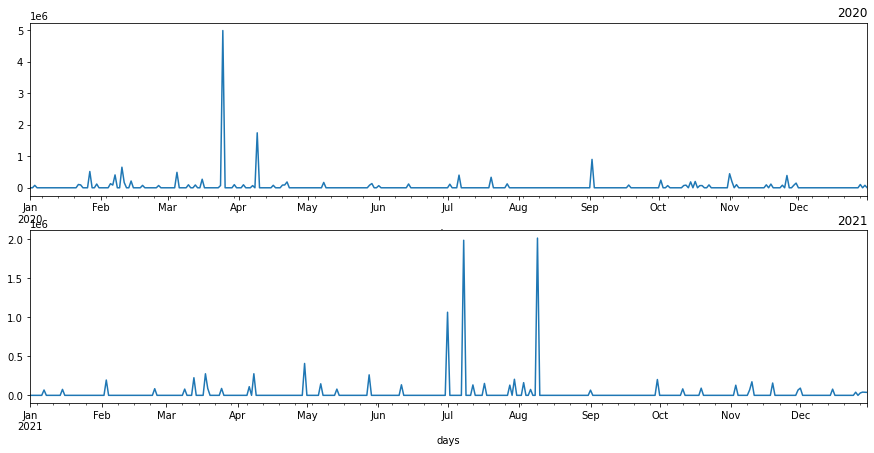

In [29]:
#2020 and 2021
# From 2008 to 2013
fig,axes=plt.subplots(2,1,figsize=(20,10))

year_range=range(2020,2022,1)
for year,ax in zip(year_range,axes.ravel()):
    plot_sector_view_count(date_time_df,year,ax)
    ax.set_title(f"{year}",loc="right")

* As we can se as the years pass by the amount of viewers increased
* In the beginning  there were many months without any viewers
* But in the end not only the amount of viewers in total boomed up but also the amount of viewers per month raised up

In [30]:
# let's analyze by months
months=[]
for x in df["publish_time"]:
    months.append(x.month_name())
df["publish_month"]=months

In [31]:
#data fraem by month
month_df=df.groupby("publish_month",as_index=False).mean()
sort_order=["January","February","March","April","May","June","July","August","September","October",
                "November","December"]
# month_df["publish_month"]=pd.Categorical(month_df["publish_month"],categories=sort_order,ordered=True)
# month_df.set_index(month_df["publish_month"],inplace=True)

month_df.index=pd.CategoricalIndex(month_df["publish_month"],categories=sort_order,ordered=True)
month_df.drop("publish_month",inplace=True,axis=1)
month_df=month_df.sort_index()

<AxesSubplot:title={'center':'average viewCount per month through out years'}, xlabel='publish_month'>

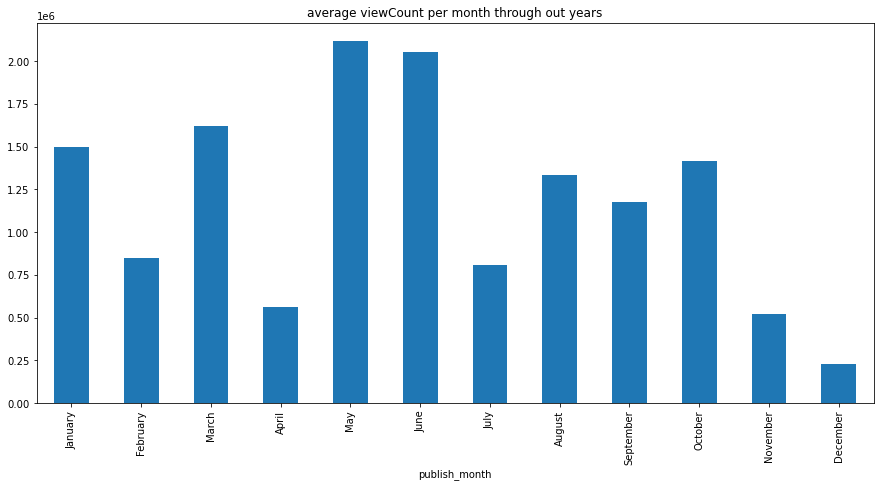

In [32]:
month_df["viewCount"].plot(kind="bar",figsize=(15,7),title="average viewCount per month through out years")

* May and June have the largest average view counts
* Average view count was the least in the end of the years(December)